<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
HAR</font>
</h1>

<p>
<font face="vazir" size=4>
HAR stands for Human Activity Recognition, and a HAR dataset typically refers to a collection of data that is used for training and evaluating models to recognize and classify human activities. Here, we want to train a SVM model on HAR dataset.
<br>
</font>
</p>


In [64]:
# Import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">Get dataset</font>
</h2>

In [65]:
# Download data
!gdown 'https://drive.google.com/u/0/uc?id=1oqhL2tyo4qJwhUq9Tdsk53KFJvm7D4AT&export=download' # train
!gdown 'https://drive.google.com/u/0/uc?id=1K15oXf8cxuxEoBSpHvpCqi6_H0AlS4XY&export=download' # test

Downloading...
From: https://drive.google.com/u/0/uc?id=1oqhL2tyo4qJwhUq9Tdsk53KFJvm7D4AT&export=download
To: /home/hossein/my-projects/hands-on-ai/human_activity_classification/train.csv
100%|██████████████████████████████████████| 49.0M/49.0M [00:29<00:00, 1.66MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1K15oXf8cxuxEoBSpHvpCqi6_H0AlS4XY&export=download
To: /home/hossein/my-projects/hands-on-ai/human_activity_classification/test.csv
100%|██████████████████████████████████████| 19.4M/19.4M [00:13<00:00, 1.44MB/s]


In [66]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">EDA</font>
</h2>

In [67]:
train.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAccmeanX to Activity_Name
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [69]:
train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [70]:
train.isnull().sum().any()

False

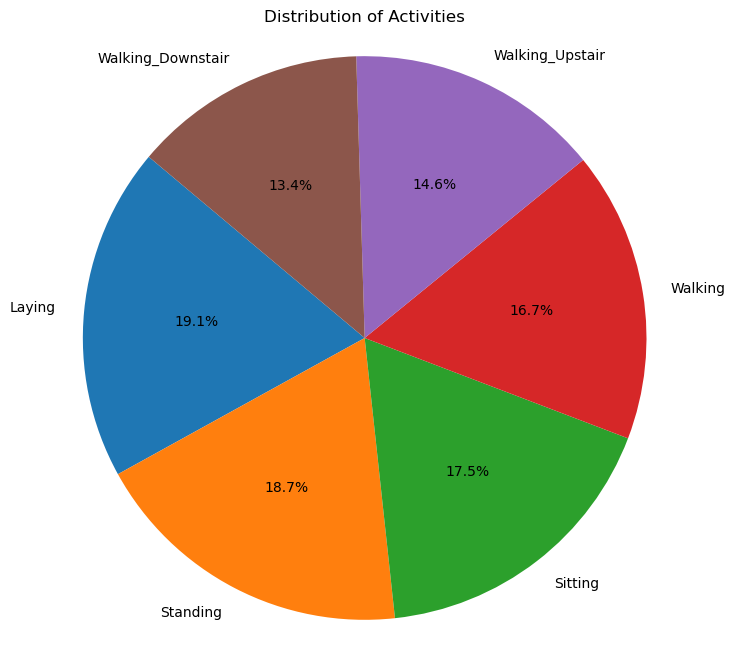

In [71]:
labels_count = train.Activity_Name.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(labels_count.values, labels=labels_count.index.values, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Activities')
plt.axis('equal')
plt.show()

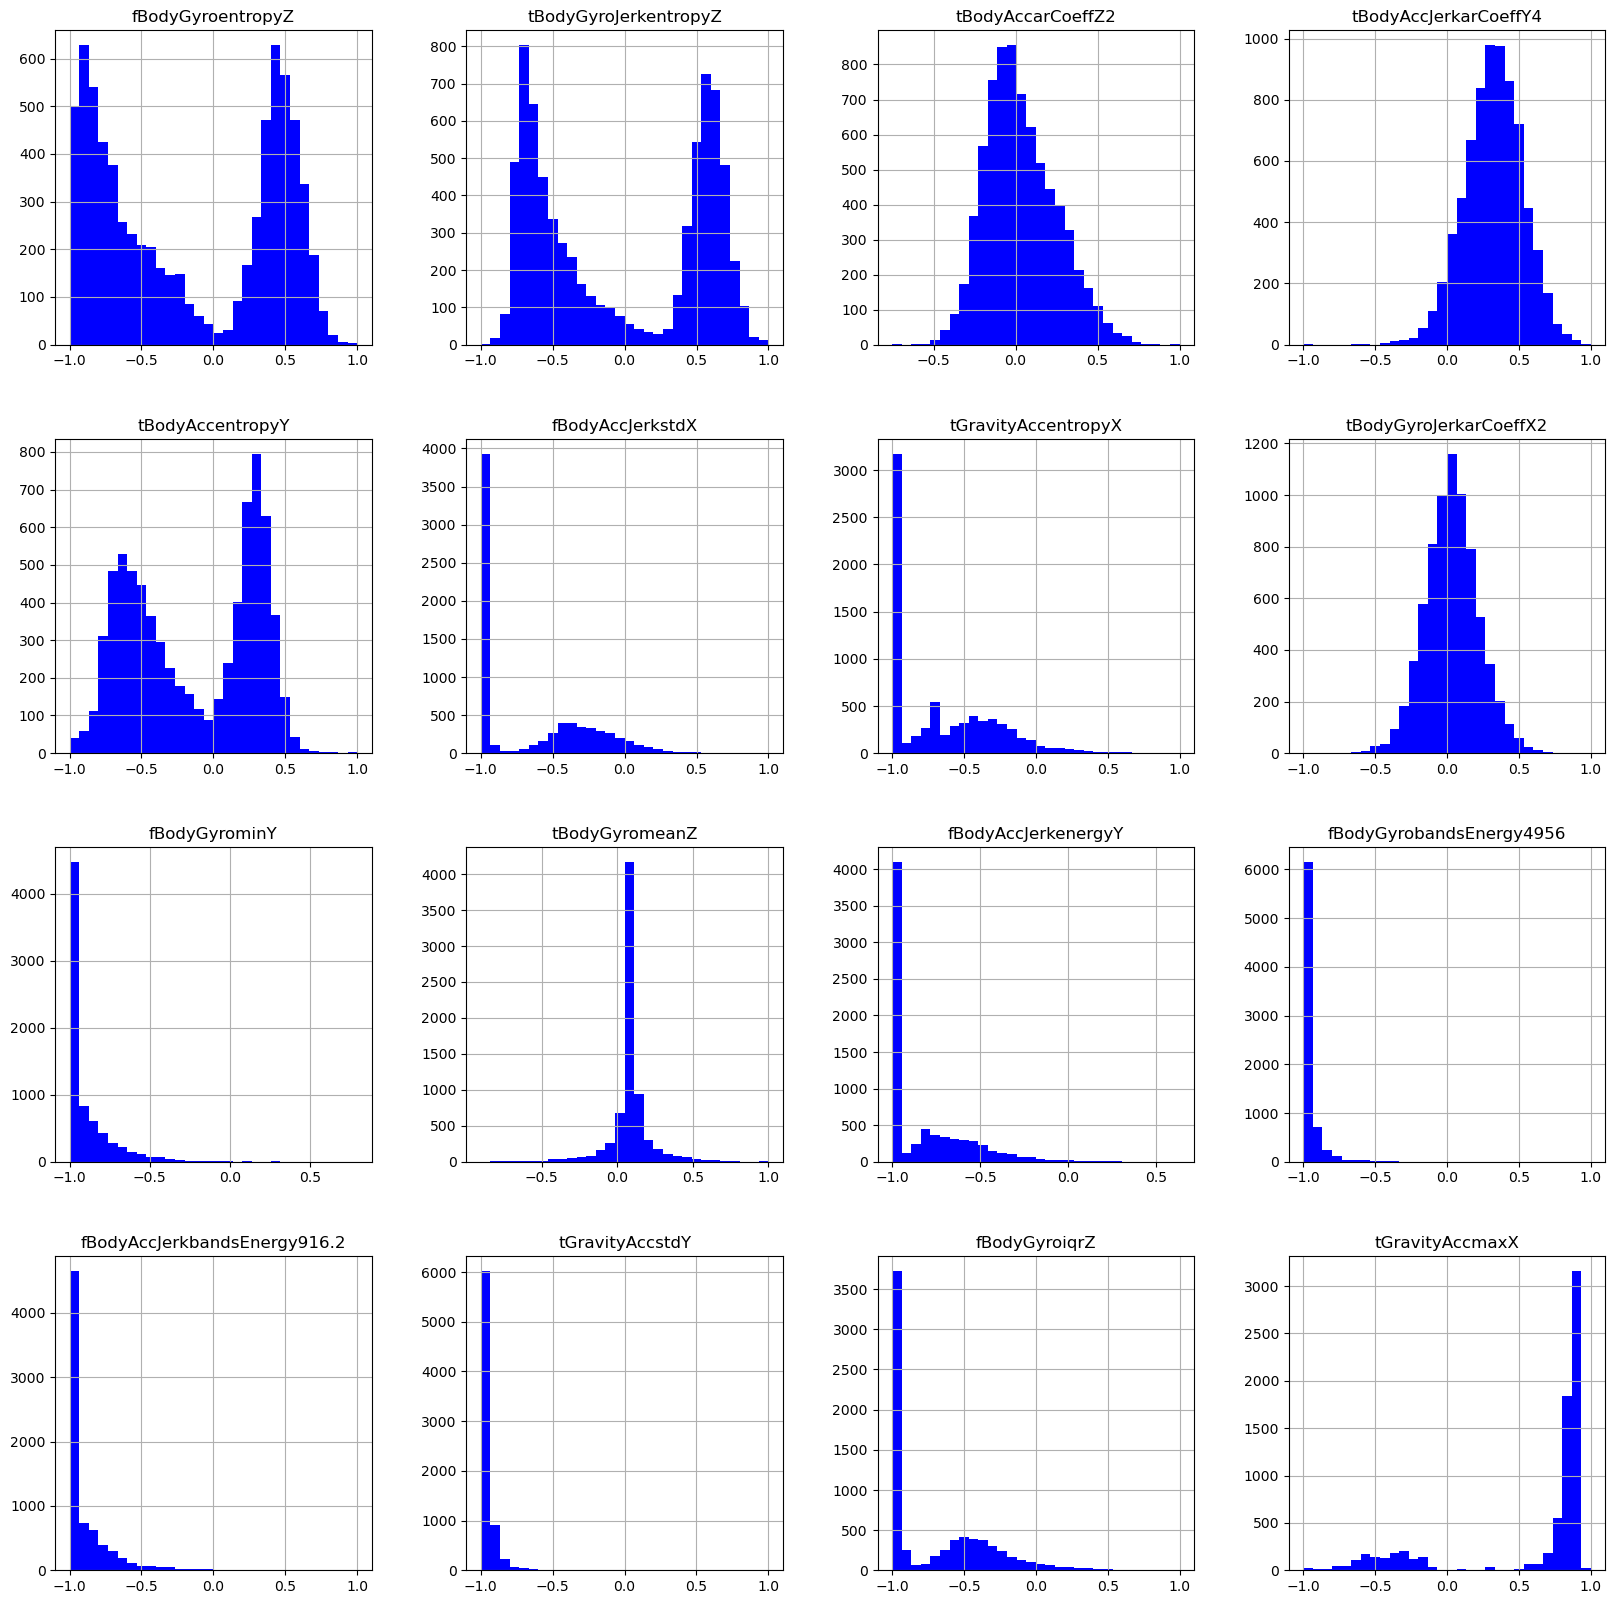

In [72]:
# Check distribution of some features
rcolumns = random.sample(list(train.columns), 16)
train[rcolumns].hist(bins=30, figsize=(20,20), color='b')
plt.show()

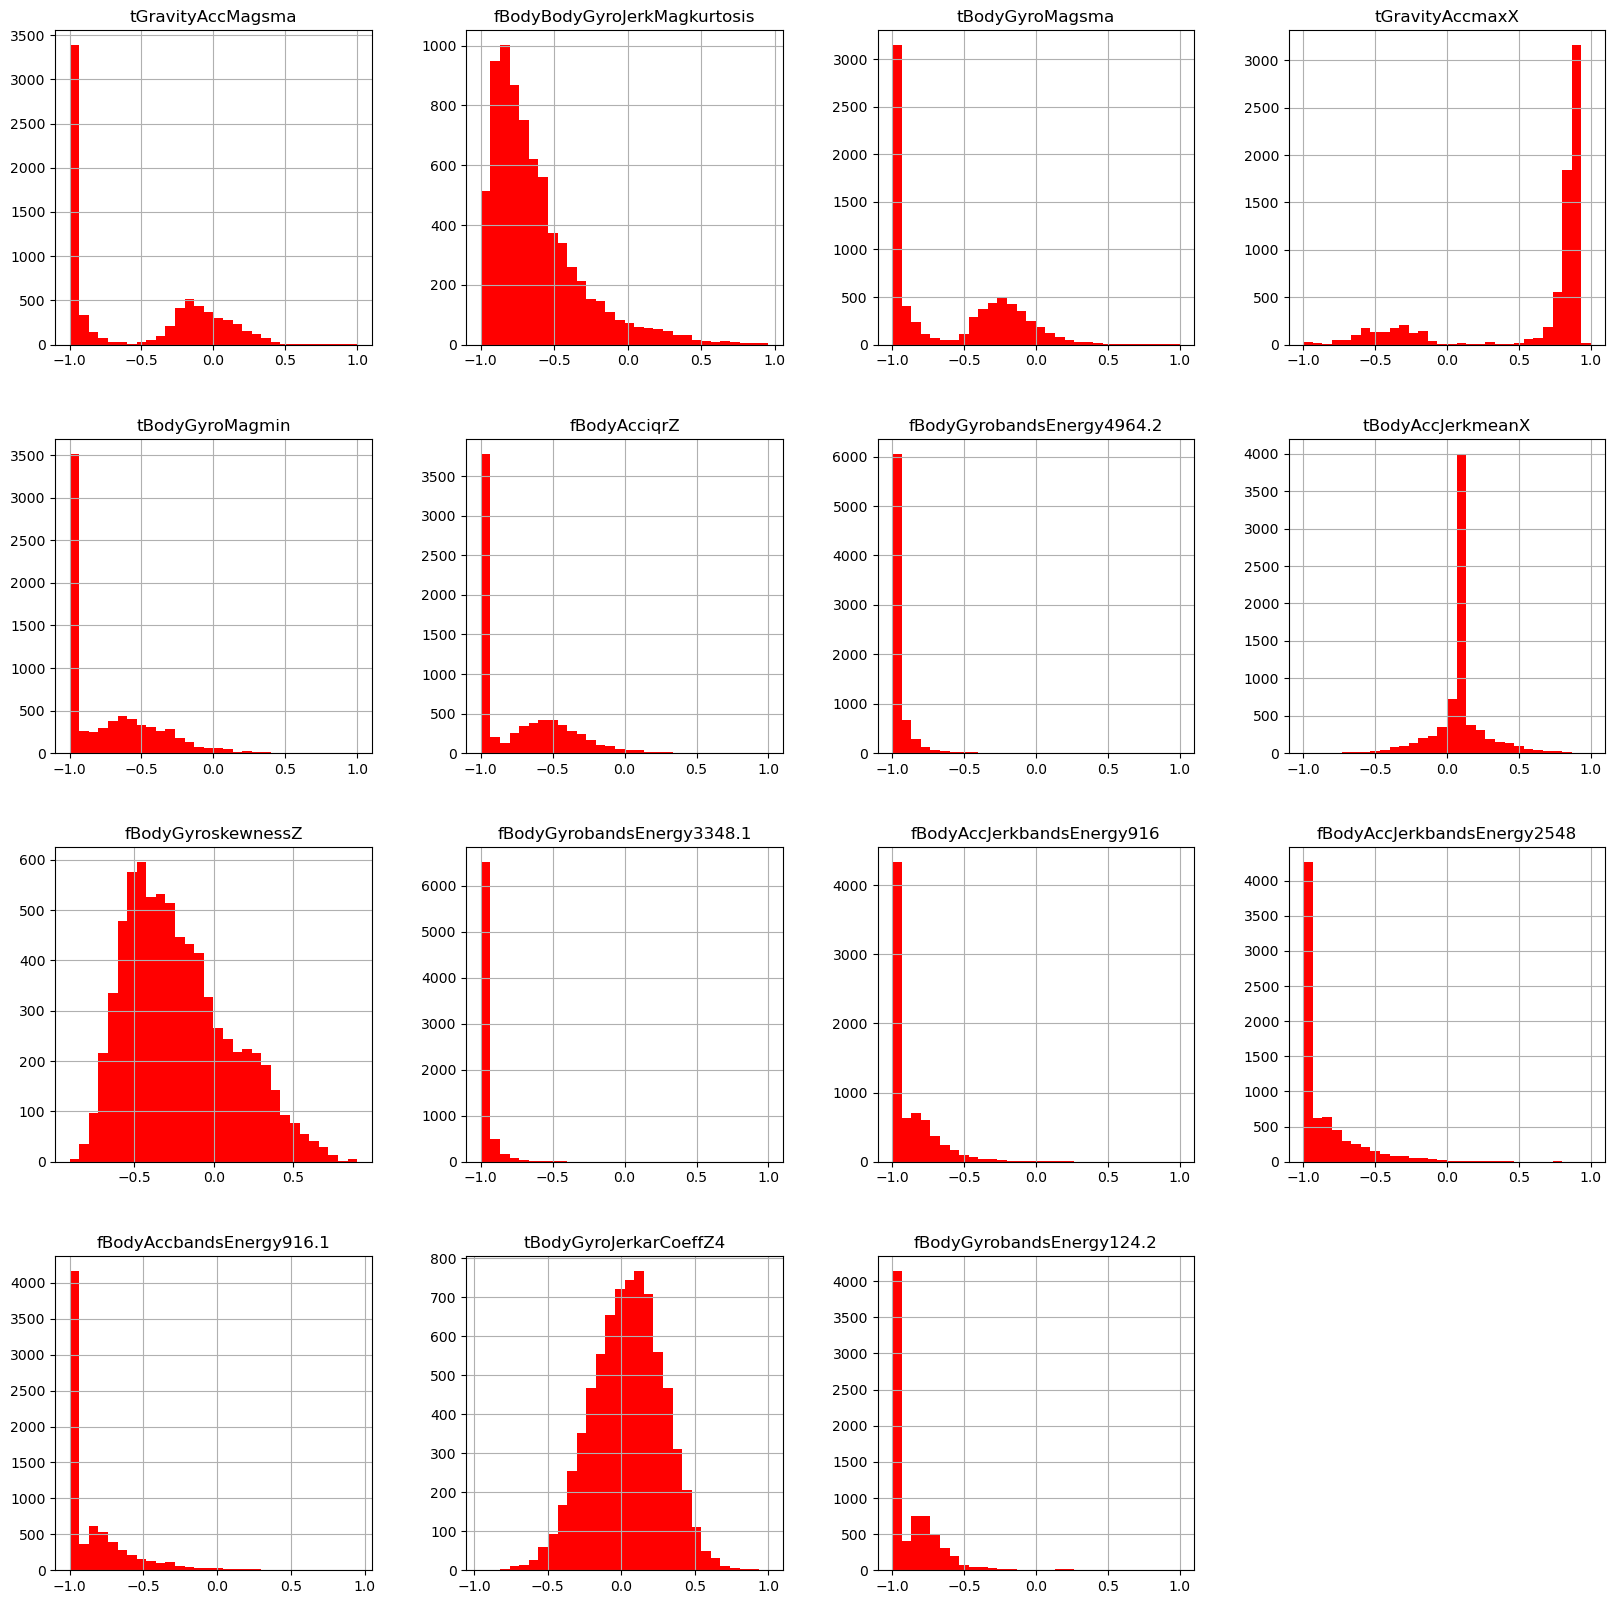

In [73]:
# Check distribution of some features
rcolumns = random.sample(list(train.columns), 16)
train[rcolumns].hist(bins=30, figsize=(20,20), color='r')
plt.show()

<Axes: >

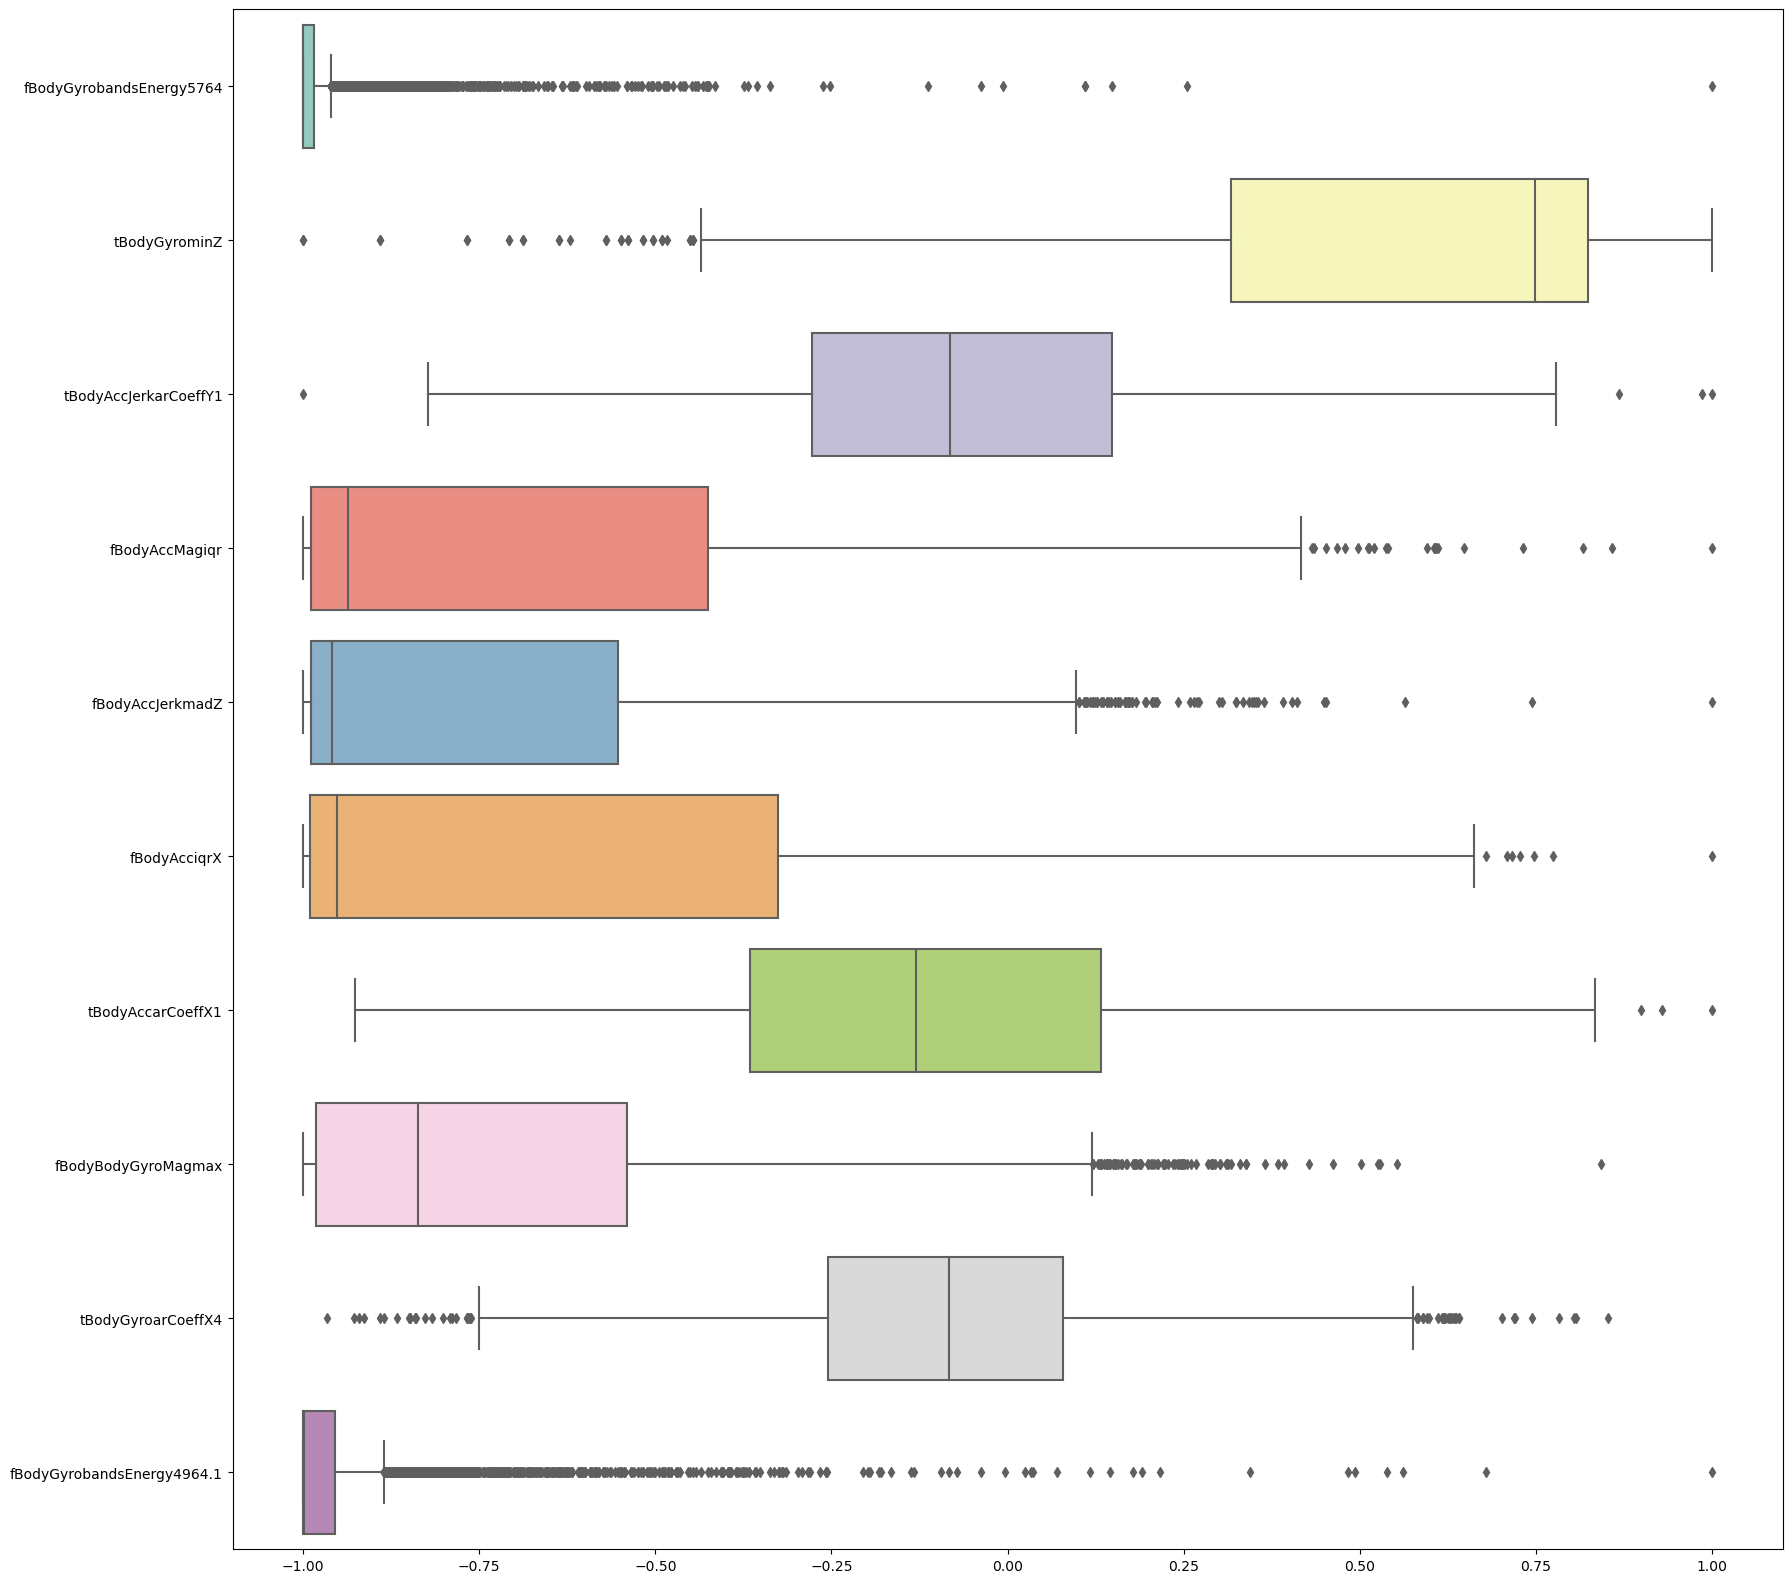

In [74]:
# Draw boxplot of some features
rcolumns = random.sample(list(train.columns), 10)
train[rcolumns]
plt.figure(figsize=(20,20))
sns.boxplot(data=train[rcolumns], palette='Set3', orient='h')

<h2 align=Left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">Feature Engineering</font>
</h2>

In [82]:
first_target_idx = -1
feature_names = list(train)[:first_target_idx]
target_names = list(train)[first_target_idx:]
columns_to_drop = ['Subject', 'Activity_Name', 'Activity']

In [90]:
# Detect most important features using Random Forest
train_ss = train[(train.Activity_Name == 'Sitting') | (train.Activity_Name == 'Standing')]
X_ss = train_ss.drop(columns_to_drop, axis=1)
y_ss = train_ss.Activity_Name.map({'Sitting': 0, 'Standing': 1}).values
dtr = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
dtr.fit(X_ss, y_ss)
dtr.feature_importances_
importance_indices = np.argsort(dtr.feature_importances_)[::-1]

In [91]:
# Define a transformer to scale k most important features
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, k, feature_importance):
        self.k = k
        self.feature_importances = feature_importance
    def fit(self, X, y=None):
        self.top_k_idx = np.argsort(self.feature_importances)[::-1][:self.k]
        return self
    def transform(self, X):
        scales = np.arange(self.k)[::-1] + 1
        X.iloc[:, self.top_k_idx] = X.iloc[:, self.top_k_idx] * scales
        return X

In [92]:
features = train.drop(columns=columns_to_drop, axis=1)

In [93]:
# Define a pipeline for feature engineering
feature_engineering = Pipeline([
    # ('normalizer', StandardScaler()),
    # ('pca', PCA(n_components=0.99, random_state=42)),
    # ('power transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', FeatureScaler(10, dtr.feature_importances_)),
])

X = feature_engineering.fit_transform(features).values

In [94]:
# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(train.Activity_Name)
y

array([2, 2, 2, ..., 5, 5, 5])

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">Train SVM model</font>
</h2>

In [95]:
# Define a stratified k-fold cross validator with 3 splits
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define a grid search to find best hyperparameters for SVM
param_grid = [{
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 0.5, 1, 10],
    'gamma': [0.01, 0.1, 1, 5, 10],
}]

svm_clf = SVC(random_state=42, decision_function_shape='ovr')
grid_search = GridSearchCV(svm_clf, param_grid, cv=skf, scoring='f1_weighted', verbose=3)
grid_search.fit(X, y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.985 total time=   1.1s
[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.983 total time=   1.1s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.980 total time=   1.1s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.936 total time=   5.1s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.937 total time=   4.8s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.935 total time=   5.4s
[CV 1/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.983 total time=   1.4s
[CV 2/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.984 total time=   1.4s
[CV 3/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.981 total time=   1.3s
[CV 1/3] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.133 total time=  16.9s
[CV 2/3] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.145 total time=  16.6s
[CV 3/3] END .C=0.1, gamma=0.01, kernel=sigmoid

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 0.5, 1, 10],
                          'gamma': [0.01, 0.1, 1, 5, 10],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='f1_weighted', verbose=3)

In [108]:
print(f'Best score: {100 * grid_search.best_score_: 0.2f}')
print(f'Best params:', grid_search.best_params_)

Best score:  99.06
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">Evaluate the model</font>
</h2>

In [112]:
# Predict using cross validation
y_pred = cross_val_predict(SVC(**grid_search.best_params_, random_state=42), X, y, cv=skf)

# Print scores
print(f'validation accuracy score: {100 * accuracy_score(y, y_pred): 0.2f}')
print(f"validation f1_score(weighted) {f1_score(y, y_pred, average='weighted'): 0.2f}")
print()
print(classification_report(y, y_pred))

validation accuracy score:  99.06
validation f1_score(weighted)  0.99

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       0.97      0.98      0.97      1286
           2       0.98      0.97      0.98      1374
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00      1073

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352



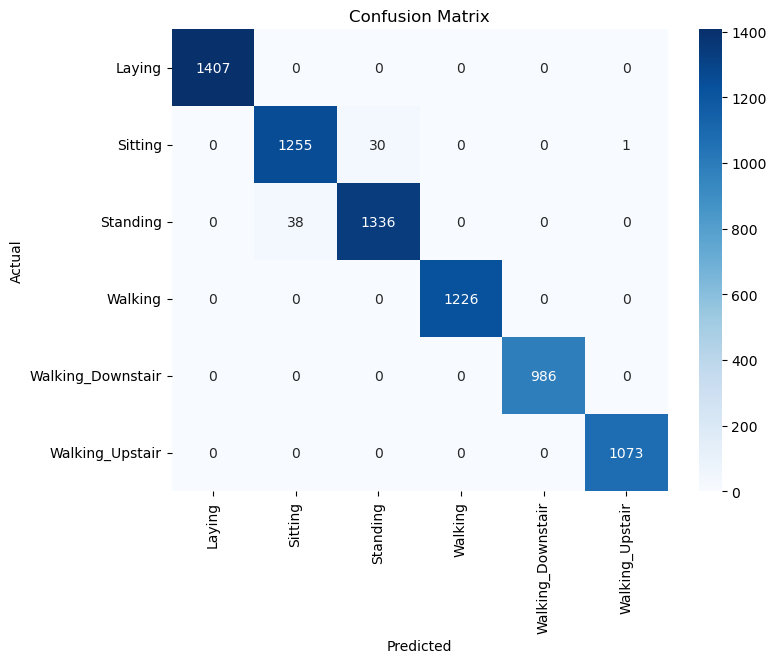

In [113]:
# Plot confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
class_names = target_encoder.inverse_transform([0, 1, 2, 3, 4, 5])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
# Train best model on whole data
final_model = SVC(**grid_search.best_params_, random_state=42)
final_model.fit(X, y)

SVC(C=10, gamma=0.01, random_state=42)

In [110]:
# Predict on train data
y_pred = final_model.predict(X)
print(f'accuracy score on all train data: {100 * accuracy_score(y, y_pred): 0.2f}')
print(f"f1_score(weighted) on all train data: {100 * f1_score(y, y_pred, average='weighted'): 0.2f}")

accuracy score on all train data:  99.82
f1_score(weighted) on all train data:  99.82


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">Predict test dataset</font>
</h2>

In [111]:
# Prepare test data
X_test = feature_engineering.transform(test).values

# Predict on test data
y_pred = final_model.predict(X_test)

# Reverse encoding
predicted_activity_names = target_encoder.inverse_transform(y_pred)

# Save submission
submission = pd.DataFrame(predicted_activity_names, columns=['Activity_Name'])
submission.to_csv('submission.csv', index=False)